# Linear Regression with Religion Diversity

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as smrp
import sklearn as sk
import country_converter as coco

In [176]:
freedom_world_df = pd.read_csv('../datasets/processed/democracy/freedom-world/freedom-world-snapshot.csv', header=0)
world_bank_df = pd.read_csv('../datasets/processed/women/world-bank/women-business-and-the-law-snapshot.csv', header=0)
religious_diversity_df = pd.read_csv('../datasets/processed/religion/pew-research-center-religion-diversity/religious-diversity-index-extended.csv', header=0)

merged_df = freedom_world_df.merge(world_bank_df, on='iso3', how='inner', suffixes=('_f', '_g'))
merged_df = merged_df.merge(religious_diversity_df, on='iso3', how='inner', suffixes=('_f', '_g'))

print(f"Countries in Freedom in the World: {len(freedom_world_df)}")
print(f"Countries in World Bank: {len(world_bank_df)}")
print(f"Countries in Religious Diversity: {len(religious_diversity_df)}")
print(f"Countries in all the datasets: {len(merged_df)}")
merged_df.head()

Countries in Freedom in the World: 195
Countries in World Bank: 190
Countries in Religious Diversity: 230
Countries in all the datasets: 187


,iso3,country_f,status,pr_rating,cl_rating,a1,a2,a3,a,b1,b2,b3,b4,b,c1,c2,c3,c,pr,d1,d2,d3,d4,d,e1,e2,e3,e,f1,f2,f3,f4,f,g1,g2,g3,g4,g,cl,total,country_g,ISO Code,wbl_index,mobility,woman_choose_residence,woman_travel_outside_home,woman_apply_passport,woman_travel_abroad,workplace,woman_get_job,law_prohibits_gender_discrimination,law_sexual_harassment,penalties_sexual_harassment,pay,law_equal_pay,woman_work_night,woman_work_dangerous,woman_work_industrial,marriage,no_obey_husband_law,woman_head_household,law_domestic_violence,woman_divorce_rights,woman_remarry_rights,parenthood,paid_maternity_leave_14weeks,paid_maternity_leave_length,govt_pays_maternity_leave,paid_paternity_leave,paid_paternity_leave_length,paid_parental_leave,parental_leave_shared_days,parental_leave_mother_days,parental_leave_father_days,protect_pregnant_workers,entrepreneurship,law_credit_gender_discrimination,woman_sign_contract,woman_register_business,woman_open_bank_account,assets,equal_property_rights,equal_inheritance_children,equal_inheritance_spouses,equal_asset_admin_marriage,value_nonmonetary_contributions,pension,equal_pension_age_full,equal_pension_age_partial,equal_retirement_age,pension_credit_childcare,country,rdi,christian,muslim,unaffiliated,hindu,buddhist,folk,other,jewish,population,dominant_religion,maj_christian,maj_muslim,maj_unaffiliated,maj_hindu,maj_buddhist,maj_folk,maj_other,maj_jewish
0,AFG,Afghanistan,NF,7,7,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,3,0,0,0,0,0,0,1,0,1,2,5,6,Afghanistan,AFG,31.875,25,False,False,True,False,50,False,False,True,True,0,False,False,False,False,20,False,True,False,False,False,20,False,90,False,True,14,False,0,0,0,False,75,False,True,True,True,40,True,False,False,True,False,25,False,False,True,False,Afghanistan,0.1,0.001,0.997,0.000,0.000,0.0,0.000,0.000,0.0,31410000,muslim,0,1,0,0,0,0,0,0
1,ALB,Albania,PF,3,3,3,3,3,9,3,3,3,3,12,3,2,2,7,28,2,4,3,4,13,3,3,2,8,3,2,2,3,10,3,2,2,2,9,40,68,Albania,ALB,91.250,100,True,True,True,True,100,True,True,True,True,100,True,True,True,True,100,True,True,True,True,True,80,True,365,True,True,3,False,0,0,0,True,100,True,True,True,True,100,True,True,True,True,True,50,False,False,True,True,Albania,3.7,0.180,0.803,0.014,0.000,0.0,0.000,0.002,0.0,3200000,muslim,0,1,0,0,0,0,0,0
2,DZA,Algeria,NF,6,5,1,1,1,3,1,1,1,1,4,1,1,1,3,10,1,1,2,1,5,1,1,1,3,1,1,2,2,6,2,2,2,1,7,21,31,Algeria,DZA,57.500,75,True,True,False,True,75,True,False,True,True,50,True,False,False,True,60,True,True,True,False,False,60,True,98,True,True,3,False,0,0,0,False,75,False,True,True,True,40,True,False,False,True,False,25,False,False,False,True,Algeria,0.5,0.002,0.979,0.018,0.000,0.0,0.000,0.000,0.0,35470000,muslim,0,1,0,0,0,0,0,0
3,AGO,Angola,NF,6,5,0,2,1,3,1,1,1,2,5,1,1,0,2,10,1,2,2,2,7,1,1,1,3,1,1,1,2,5,1,1,1,0,3,18,28,Angola,AGO,79.375,100,True,True,True,True,100,True,True,True,True,50,True,True,False,False,100,True,True,True,True,True,60,False,90,True,True,1,False,0,0,0,True,100,True,True,True,True,100,True,True,True,True,True,25,False,True,False,False,Angola,2.0,0.905,0.002,0.051,0.000,0.0,0.042,0.000,0.0,19080000,christian,1,0,0,0,0,0,0,0
4,ATG,Antigua and Barbuda,F,2,2,4,4,3,11,3,4,3,3,13,3,2,3,8,32,3,4,4,4,15,4,3,3,10,4,3,3,3,13,4,3,3,3,13,51,83,Antigua and Barbuda,ATG,68.750,75,False,True,True,True,50,True,True,False,False,75,False,True,True,True,100,True,True,True,True,True,20,True,98,False,False,0,False,0,0,0,False,75,False,True,True,True,80,True,True,True,True,False,75,True,True,True,False,Antigua and Barbuda,1.5,0.930,0.006,0.017,0.002,0.0,0.036,0.010,0.0,90000,christian,1,0,0,0,0,0,0,0


In [177]:
print(freedom_world_df.info())
print(world_bank_df.info())
print(religious_diversity_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   iso3       195 non-null    object
 1   country    195 non-null    object
 2   status     195 non-null    object
 3   pr_rating  195 non-null    int64 
 4   cl_rating  195 non-null    int64 
 5   a1         195 non-null    int64 
 6   a2         195 non-null    int64 
 7   a3         195 non-null    int64 
 8   a          195 non-null    int64 
 9   b1         195 non-null    int64 
 10  b2         195 non-null    int64 
 11  b3         195 non-null    int64 
 12  b4         195 non-null    int64 
 13  b          195 non-null    int64 
 14  c1         195 non-null    int64 
 15  c2         195 non-null    int64 
 16  c3         195 non-null    int64 
 17  c          195 non-null    int64 
 18  pr         195 non-null    int64 
 19  d1         195 non-null    int64 
 20  d2         195 non-null    int64

In [178]:
predictors = ["total", "pr_rating", "cl_rating", "wbl_index","mobility","workplace","pay","marriage","parenthood","entrepreneurship","assets","pension","rdi", "maj_christian","maj_muslim","maj_unaffiliated","maj_hindu","maj_buddhist","maj_folk","maj_other","maj_jewish"]
X = merged_df[predictors]

scaler = sk.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
# Recover the original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled = sm.add_constant(X_scaled)

results_reg = smf.ols(formula='total ~ wbl_index + mobility + workplace + pay + marriage + parenthood + entrepreneurship + assets + pension + rdi +maj_christian + maj_muslim + maj_unaffiliated + maj_hindu + maj_buddhist + maj_folk + maj_other + maj_jewish', data=X_scaled).fit()
print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     11.58
Date:                Wed, 07 May 2025   Prob (F-statistic):           3.03e-19
Time:                        00:12:37   Log-Likelihood:                -199.82
No. Observations:                 187   AIC:                             431.6
Df Residuals:                     171   BIC:                             483.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7.893e-17      0.054  

/Users/damian.calabresi/Studies/UMD/MSML 602 - Principles of Data Science/project/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


The main coefficients are:
- WBL Index
- Marriage
- Pension
- Pay
- maj_christian
- maj_muslim

Now I'm going to run a regression with only these predictors.

In [179]:
results_reg = smf.ols(formula='total ~ wbl_index + pay + marriage + pension + maj_christian + maj_muslim', data=X_scaled).fit()
print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     25.05
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.66e-21
Time:                        00:12:37   Log-Likelihood:                -208.58
No. Observations:                 187   AIC:                             431.2
Df Residuals:                     180   BIC:                             453.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.893e-17      0.055  -1.43e-15

Pay, Marriage, and Pension seem to be the most important predictors.

In [180]:
results_reg = smf.ols(formula='total ~ wbl_index * maj_christian + mobility * maj_christian + workplace * maj_christian + pay * maj_christian + marriage * maj_christian + \
                      parenthood * maj_christian + entrepreneurship * maj_christian + assets * maj_christian + pension * maj_christian +\
                      wbl_index * maj_muslim + mobility * maj_muslim + workplace * maj_muslim + pay * maj_muslim + marriage * maj_muslim + \
                      parenthood * maj_muslim + entrepreneurship * maj_muslim + assets * maj_muslim + pension * maj_muslim', data=X_scaled).fit()
print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     10.28
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.08e-22
Time:                        00:12:37   Log-Likelihood:                -173.52
No. Observations:                 187   AIC:                             401.0
Df Residuals:                     160   BIC:                             488.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Now the most significant predictors are:
- WBL Index (0.1442)
- Christian majority (-0.5289)
- Pay (0.1710)
- Marriage (0.5358)
- Parenthood (0.1679)

The country being Christian or Muslim has a negative effect on the democracy index, but when "assets" is high, the effect is very very positive. (1.1271 and 1.0296 respectively)

## LASSO

In [181]:
predictors = ["wbl_index","mobility","workplace","pay","marriage","parenthood","entrepreneurship","assets","pension","rdi","maj_christian","maj_muslim","maj_unaffiliated","maj_hindu","maj_buddhist","maj_folk","maj_other","maj_jewish"]
y_lasso = X_scaled["total"]
X_lasso = X_scaled[predictors]

# LASSO
lasso = sk.linear_model.Lasso(alpha=0.1)
lasso.fit(X_lasso, y_lasso)

results_df = pd.DataFrame({
    'Feature': predictors,
    'Coefficient': lasso.coef_
})

y_pred = lasso.predict(X_lasso)
r2 = sk.metrics.r2_score(y_lasso, y_pred)

print("Lasso Regression Results:")
print(f"Intercept: {lasso.intercept_}")
print(f"R-squared: {r2}")
print(results_df.sort_values('Coefficient', ascending=False))




Lasso Regression Results:
Intercept: -4.967499274294182e-17
R-squared: 0.43327821608344186
             Feature  Coefficient
4           marriage     0.305207
8            pension     0.146289
3                pay     0.079991
0          wbl_index     0.053865
10     maj_christian     0.013589
1           mobility     0.000000
5         parenthood     0.000000
6   entrepreneurship     0.000000
7             assets     0.000000
2          workplace    -0.000000
9                rdi    -0.000000
12  maj_unaffiliated     0.000000
13         maj_hindu     0.000000
15          maj_folk    -0.000000
17        maj_jewish     0.000000
16         maj_other     0.000000
14      maj_buddhist    -0.012710
11        maj_muslim    -0.130450


With regulatization we obtain a similar result. The most important predictors are:
- marriage
- pension
- pay
- wbl_index
- maj_christian

The R-squared is 0.433 compared to 0.5 without regularization, which means the regression isn't affected by much.

In [182]:
poly = sk.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_lasso)
poly_feature_names = poly.get_feature_names_out(predictors)

lasso = sk.linear_model.Lasso(alpha=0.1)
lasso.fit(X_poly, y_lasso)

results_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': lasso.coef_
})

y_pred = lasso.predict(X_poly)
r2 = sk.metrics.r2_score(y_lasso, y_pred)

print("Lasso Regression Results:")
print(f"Intercept: {lasso.intercept_}")
print(f"R-squared: {r2}")
# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(results_df.sort_values('Coefficient', ascending=False))

Lasso Regression Results:
Intercept: 0.008113919835109184
R-squared: 0.5261760748636388
                               Feature  Coefficient
4                             marriage     0.187139
98                        parenthood^2     0.161851
0                            wbl_index     0.154695
8                              pension     0.104736
3                                  pay     0.077358
138           pension maj_unaffiliated     0.025791
56                workplace parenthood     0.022557
141                   pension maj_folk     0.010932
125                         assets rdi     0.005754
43                    mobility pension     0.004625
168                 maj_unaffiliated^2     0.004486
174                        maj_hindu^2     0.003467
188                       maj_jewish^2     0.003456
13                           maj_hindu     0.000000
14                        maj_buddhist    -0.000000
15                            maj_folk    -0.000000
16                          

Again, here we can see the same result. A country with religions that are not Christian or Muslim have a bigger tendency to be democratic.

Still, the main predictors are marriage, parenthood, wbl_index, pay, and pension.

## Analyze each religion separately

### Countries that aren't Christian or Muslim

In [183]:
christian_df = merged_df[merged_df["dominant_religion"] == "christian"]
muslim_df = merged_df[merged_df["dominant_religion"] == "muslim"]
other_df = merged_df[(merged_df['dominant_religion'] != "christian") & (merged_df['dominant_religion'] != "muslim")]

results_reg = smf.ols(formula='total ~ wbl_index + mobility + workplace + pay + marriage + parenthood + entrepreneurship + assets + pension + rdi', data=other_df).fit()
print(results_reg.summary())



                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2.373
Date:                Wed, 07 May 2025   Prob (F-statistic):              0.107
Time:                        00:12:37   Log-Likelihood:                -80.664
No. Observations:                  19   AIC:                             181.3
Df Residuals:                       9   BIC:                             190.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.0942    101.006  

/Users/damian.calabresi/Studies/UMD/MSML 602 - Principles of Data Science/project/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


Pension, Assets and Pension are significant. Assets is negatively correlated, this is rare.

If we correlate only those that are somewhat significant

In [184]:
results_reg = smf.ols(formula='total ~ mobility + pay + parenthood + assets + pension', data=other_df).fit()
print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     5.055
Date:                Wed, 07 May 2025   Prob (F-statistic):            0.00861
Time:                        00:12:37   Log-Likelihood:                -81.956
No. Observations:                  19   AIC:                             175.9
Df Residuals:                      13   BIC:                             181.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.9268     69.198     -0.086      0.9

/Users/damian.calabresi/Studies/UMD/MSML 602 - Principles of Data Science/project/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


We find again that a higher score in assets is negatively correlated with the level of freedom in a country.

#### Identify Outliers

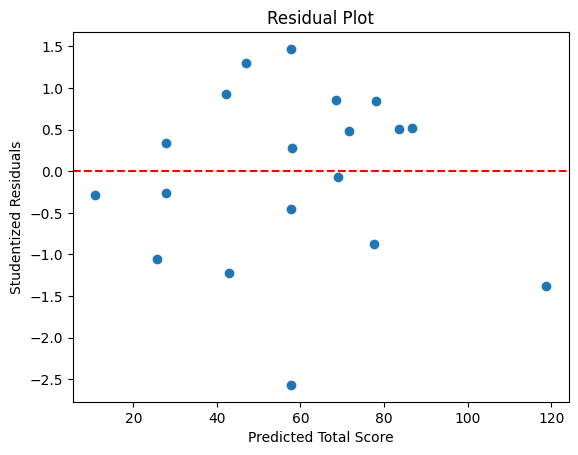

In [185]:
y_hat = results_reg.fittedvalues
residuals = results_reg.resid
studentized_residuals = results_reg.get_influence().resid_studentized_external

plt.scatter(y_hat, studentized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Total Score")
plt.ylabel("Studentized Residuals")
plt.title("Residual Plot")
plt.show()

### Countries with Christian majority

In [186]:
results_reg = smf.ols(formula='total ~ wbl_index + mobility + workplace + pay + marriage + parenthood + entrepreneurship + assets + pension + rdi', data=christian_df).fit()
print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     10.75
Date:                Wed, 07 May 2025   Prob (F-statistic):           6.84e-12
Time:                        00:12:37   Log-Likelihood:                -541.19
No. Observations:                 122   AIC:                             1102.
Df Residuals:                     112   BIC:                             1130.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -39.4181     20.061  

Here it looks like workplace, pay, marriage, parenthood, and pension are correlated. Assets is again negatively correlated.
In this case the model doesn't fit very well.

#### Identify Outliers

                      Country  Residuals
126                    Panama   2.068387
169                      Togo  -2.045180
59                      Gabon  -2.175627
31   Central African Republic  -2.411034
118                 Nicaragua  -2.525190
182                 Venezuela  -2.602621
136                    Rwanda  -2.729200
14                    Belarus  -3.039281


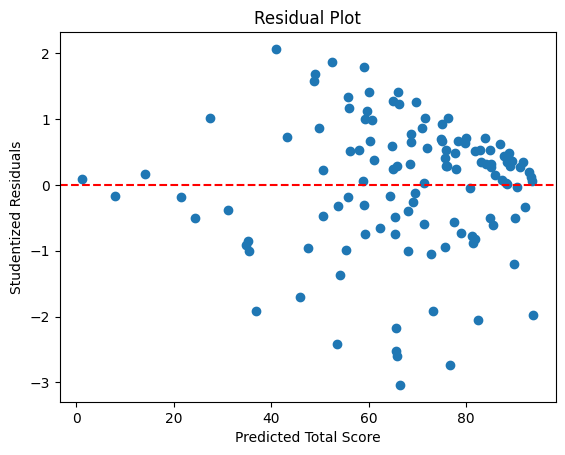

In [187]:
y_hat = results_reg.fittedvalues
residuals = results_reg.resid
studentized_residuals = results_reg.get_influence().resid_studentized_external

residuals_df = pd.DataFrame({
    'Country': christian_df['country'],
    'Residuals': studentized_residuals
})

extreme_countries = residuals_df[
    (residuals_df['Residuals'] > 2) | 
    (residuals_df['Residuals'] < -2)
]
print(extreme_countries.sort_values('Residuals', ascending=False))

plt.scatter(y_hat, studentized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Total Score")
plt.ylabel("Studentized Residuals")
plt.title("Residual Plot")
plt.show()

Some of the outliers are countries previously democratic but with recent dictatorships like: Belarus, Venezuela, or Nicaragua

### Countries with Muslim Majority

In [188]:
results_reg = smf.ols(formula='total ~ wbl_index + mobility + workplace + pay + marriage + parenthood + entrepreneurship + assets + pension + rdi', data=muslim_df).fit()
print(results_reg.summary())


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     2.038
Date:                Wed, 07 May 2025   Prob (F-statistic):             0.0631
Time:                        00:12:37   Log-Likelihood:                -187.31
No. Observations:                  46   AIC:                             394.6
Df Residuals:                      36   BIC:                             412.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           22.1953     15.655  

None of the predictors are significant and the model doesn't really fit.

#### Identify Outliers

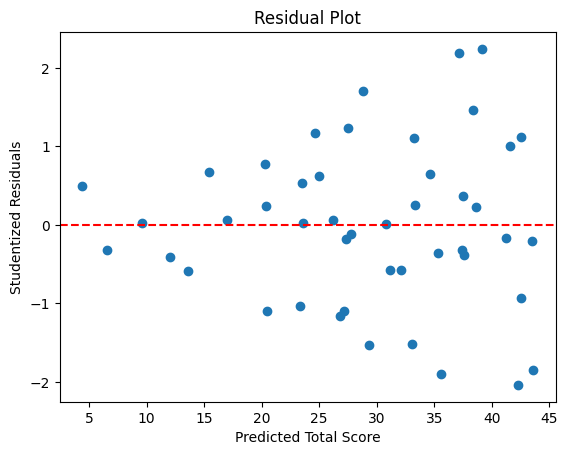

In [189]:
y_hat = results_reg.fittedvalues
residuals = results_reg.resid
studentized_residuals = results_reg.get_influence().resid_studentized_external

plt.scatter(y_hat, studentized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Total Score")
plt.ylabel("Studentized Residuals")
plt.title("Residual Plot")
plt.show()

# Compare against Political Rights and Civil Rights

### Political Rights

In [190]:
results_reg = smf.ols(formula='pr_rating ~ wbl_index + mobility + workplace + pay + marriage + parenthood + entrepreneurship + assets + pension + rdi +maj_christian + maj_muslim + maj_unaffiliated + maj_hindu + maj_buddhist + maj_folk + maj_other + maj_jewish', data=X_scaled).fit()
print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              pr_rating   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     10.43
Date:                Wed, 07 May 2025   Prob (F-statistic):           1.69e-17
Time:                        00:12:37   Log-Likelihood:                -204.58
No. Observations:                 187   AIC:                             441.2
Df Residuals:                     171   BIC:                             492.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.806e-17      0.055  

/Users/damian.calabresi/Studies/UMD/MSML 602 - Principles of Data Science/project/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Comparing against Political Rights, it looks like marriage is the most important predictor, but not by far.

### Civil Rights

In [191]:
results_reg = smf.ols(formula='cl_rating ~ wbl_index + mobility + workplace + pay + marriage + parenthood + entrepreneurship + assets + pension + rdi +maj_christian + maj_muslim + maj_unaffiliated + maj_hindu + maj_buddhist + maj_folk + maj_other + maj_jewish', data=X_scaled).fit()
print(results_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              cl_rating   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     11.30
Date:                Wed, 07 May 2025   Prob (F-statistic):           7.84e-19
Time:                        00:12:37   Log-Likelihood:                -200.94
No. Observations:                 187   AIC:                             433.9
Df Residuals:                     171   BIC:                             485.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.469e-17      0.054  

/Users/damian.calabresi/Studies/UMD/MSML 602 - Principles of Data Science/project/.venv/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Here some are negatively correlated, others positively. This doesn't provide much information.